## I/O System Demo for  GeoidIO and SSHIO

### Import GeoidIO from gocean

In [12]:
from matplotlib import pyplot as plt

from gocean.io.geoid import GeoidIO

### Set the data directory for GeoidIO and read the .gdf file

In [13]:
# Set the data directory to GeoidIO
geoid = GeoidIO(data_dir='../../data')

# READ required file
geoid.read('geoid.gdf')

### Let's view the data and header for the geoid

In [14]:
# Required header elements
print('header: \n')
for key in geoid.header.keys():
    print(key, ': ', geoid.header[key])

header: 

lat_max :  22.78
lat_min :  5.18
long_min :  77.77
long_max :  98.67
latitude_parallels :  177
longitude_parallels :  210


In [15]:
# Geoid Data
print('Data: \n', geoid.data)

Data: 
         long    lat      geoid
0      77.77  22.78 -58.897233
1      77.87  22.78 -58.982584
2      77.97  22.78 -59.060798
3      78.07  22.78 -59.127344
4      78.17  22.78 -59.178009
...      ...    ...        ...
37165  98.27   5.18 -20.974614
37166  98.37   5.18 -20.494548
37167  98.47   5.18 -19.996221
37168  98.57   5.18 -19.483223
37169  98.67   5.18 -18.961050

[37170 rows x 3 columns]


### Create a Geoid grid and visualize

In [16]:
# Create geoid grid
geoid.create_geoid_grid()

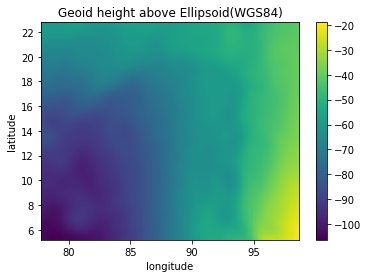

In [17]:
plt.imshow(geoid.grid[:, :, 2], extent=[geoid.header['long_min'],
                                        geoid.header['long_max'],
                                        geoid.header['lat_min'],
                                        geoid.header['lat_max']])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geoid height above Ellipsoid(WGS84)')

plt.colorbar()
plt.savefig('geoid.png')
plt.show()

### Import SSHIO from gocean

In [18]:
from gocean.io.altimetry import SSHIO

### Set the data directory for jason and saral data

In [19]:
jason = SSHIO('../../data/altimetry')

### Read the SSH data and fill the similar grid as geoid

In [20]:
jason.read(geoid.grid)

### Visualize SSH from Jason and SARAL

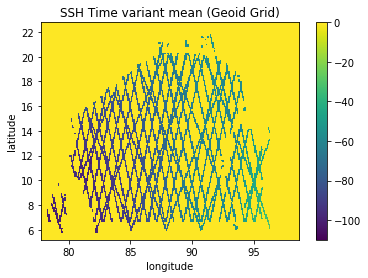

In [22]:
plt.imshow(jason.grid[:, :, 1], extent=[geoid.header['long_min'],
                                        geoid.header['long_max'],
                                        geoid.header['lat_min'],
                                        geoid.header['lat_max']])

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('SSH Time variant mean (Geoid Grid)')

plt.colorbar()

plt.savefig('ssh-tvm.png')
plt.show()

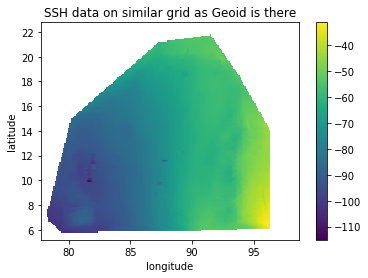

In [23]:
# plt.imshow(geoid.grid[:, :, 2], extent=[geoid.header['long_min'],
#                                         geoid.header['long_max'],
#                                         geoid.header['lat_min'],
#                                         geoid.header['lat_max']])
plt.imshow(jason.grid_filled[:, :], extent=[geoid.header['long_min'],
                                        geoid.header['long_max'],
                                        geoid.header['lat_min'],
                                        geoid.header['lat_max']])

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('SSH data on similar grid as Geoid is there')

plt.colorbar()

plt.savefig('ssh.png')
plt.show()

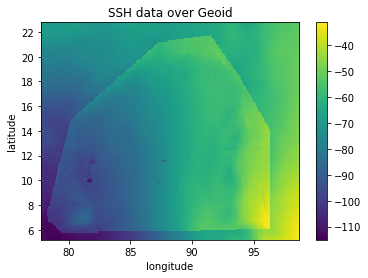

In [24]:
plt.imshow(geoid.grid[:, :, 2], extent=[geoid.header['long_min'],
                                        geoid.header['long_max'],
                                        geoid.header['lat_min'],
                                        geoid.header['lat_max']])
plt.imshow(jason.grid_filled[:, :], extent=[geoid.header['long_min'],
                                        geoid.header['long_max'],
                                        geoid.header['lat_min'],
                                        geoid.header['lat_max']])

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('SSH data over Geoid')

plt.colorbar()

plt.savefig('ssh-geoid.png')
plt.show()


### Import mdt from gocean.currents module

In [25]:
from gocean.currents.mdt import mdt

In [26]:
mdt_grid = mdt(geoid.grid[:, :, 2], jason.grid_filled)

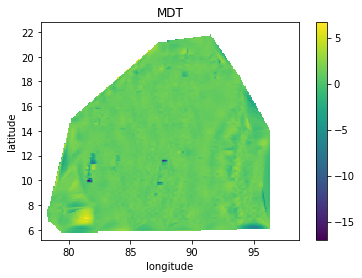

In [27]:
plt.imshow(mdt_grid, extent=[geoid.header['long_min'],
                             geoid.header['long_max'],
                             geoid.header['lat_min'],
                             geoid.header['lat_max']])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('MDT')

plt.colorbar()

plt.savefig('mdt.png')
plt.show()

In [11]:
jason.file_list


['../../data/jason2/saral/008/008_0223ssh.33.nc',
 '../../data/jason2/saral/008/008_0309ssh.33.nc',
 '../../data/jason2/saral/008/008_0881ssh.33.nc',
 '../../data/jason2/saral/008/008_0853ssh.33.nc',
 '../../data/jason2/saral/008/008_0165ssh.33.nc',
 '../../data/jason2/saral/008/008_0438ssh.33.nc',
 '../../data/jason2/saral/008/008_0552ssh.33.nc',
 '../../data/jason2/saral/008/008_0137ssh.33.nc',
 '../../data/jason2/saral/008/008_0051ssh.33.nc',
 '../../data/jason2/saral/008/008_0251ssh.33.nc',
 '../../data/jason2/saral/008/008_0524ssh.33.nc',
 '../../data/jason2/saral/008/008_0324ssh.33.nc',
 '../../data/jason2/saral/008/008_0180ssh.33.nc',
 '../../data/jason2/saral/008/008_0696ssh.33.nc',
 '../../data/jason2/saral/008/008_0266ssh.33.nc',
 '../../data/jason2/saral/008/008_0896ssh.33.nc',
 '../../data/jason2/saral/008/008_0739ssh.33.nc',
 '../../data/jason2/saral/008/008_0509ssh.33.nc',
 '../../data/jason2/saral/008/008_0567ssh.33.nc',
 '../../data/jason2/saral/008/008_0767ssh.33.nc',
